""" PORTFOLIO OPTIMIZATION

What is the optimal weighting of each Sector ETF within the portfolio of 11 ETF’s 
that will provide the maximum return, at a given level of risk? How about minimum risk, given level of return? 

We will answer this question using the Efficient Frontier Portfolio Optimization method in Python.
--

In the first portion, we will gather and clean the data, as well as do some preliminay analysis on each sector ETF.

Part 1: Import the required libraries and dependencies.

Part 2: Pull data from Alpaca API into a DataFrame, check for NaN and zero values, then plot the results.

Part 3: Next, we get the percent change to calculate returns from the closing price dataframe and graph the results.

In the second portion, we will be calculating the Efficient Frontier of the portfolio of the 11 assets (Sector ETF's) and optimizing the portfolio, and then graphing the results. 

Part 4: Generating the Efficient Frontier. We will generate randomly weighted portfolios to plot and measure Sharpe ratios. We will take the sum of the mean returns generated by the stocks for 
an average trading year (252 days). Then, we will calculate the standard deviation of each portfolio. 

Part 5: Calculate returns, standard deviation, volatility, and sharpe ratio of the generated portfolios and display results.

Part 6: Same as Part 4, but instead of using randomly weighted portfolios, we will use the SciPy Optimize function.

Part 7: Calculate returns, standard deviation, volatility, and sharpe ratio of the generated portfolios and display results.

Part 8: Parse each Sector ETF data into its own dataframe.

Part 9: Only include timestamp and close price for each Sector ETF dataframe. 

Part 10: Provide a statistical summary of each individual Sector ETF Dataframe for the full length of the dataset.
Part 11: Line Plot each individual Sector ETF Dataframe for the full length of the dataset.
Part 12: Run a Monte Carlo Simulation to forecast the Optimal Portfolio.

In the third portion, we will add a novel asset class to the portfolio and analyze how the Efficient Frontier is
affected by the addition. How will the weights change of each Sector ETF when we add in the 20 year Treasury bond
to the portfolio (Ticker TLT)? 

We will explore this in the second file titled "Inflation Hedge"
--

"""

### Part 1: Import the required libraries and dependencies

In [11]:
# Import the required libraries and dependencies

import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco
from dotenv import load_dotenv
import os
import pandas as pd
import hvplot.pandas
import numpy as np
import warnings 
warnings.filterwarnings("ignore")
from MCForecastTools import MCSimulation
%matplotlib inline

### Part 2: Pull data from Alpaca API into a DataFrame, check for NaN and zero values, plot the results

In [3]:
# Print the ETF's by symbol

print("GLD", "VNQ", "USO", "K", "TSLA", "AAPL", "AGG", "JNK")

GLD VNQ USO K TSLA AAPL AGG JNK


In [4]:
# Set the variables for the Alpaca API and secret keys
#load_dotenv("secret_code.env")

False

In [15]:
# Grab the Alpaca API Key
#alpaca_api_key = os.environ.get('PKT9GZRNU8ZZ0UAWZ5I3')
# alpaca_secret_key = os.environ.get('JNKg1fGpTBYCJlCaCueN3vnfKZOK39VhhfO6DKDE')
alpaca_api_key = "PK46ENRTMXPI1M3W2IIP"
alpaca_secret_key = 'NnKfZWkUa7UzL64qsKFAbX4BiJWSM6cycdzUW4Jx'

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [108]:
# Set the tickers for Technology - XLK, Health Care - XLV, Financials - XLF,
# Real Estate - XLRE, Energy - XLE, Materials - XLB, Communication - XLC, 
# Consumer Discretionary - XLY, Consumer Staples - XLP, 
# Industrials - XLI, Utilities - XLU

tickers = ["GLD", "VNQ", "USO", "KO", "TSLA", "AAPL", "AGG", "JNK"]

# Set timeframe to 1Day
timeframe = '1D'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# 9+1 to backtest data
start_date = pd.Timestamp("2015-08-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-08-01", tz="America/New_York").isoformat()

In [109]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame

portfolio_data = alpaca.get_bars(
    tickers, 
    timeframe,
    start = start_date,
    end = end_date
).df

# portfolio_data

In [110]:
portfolio_data.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2015-12-01 05:00:00+00:00,118.75,118.81,116.86,117.34,34852374,187129,117.756760,AAPL
2015-12-02 05:00:00+00:00,117.05,118.11,116.08,116.28,33385643,180616,117.151198,AAPL
2015-12-03 05:00:00+00:00,116.55,116.79,114.22,115.20,41560785,245330,115.434888,AAPL
2015-12-04 05:00:00+00:00,115.29,119.25,115.11,119.03,57776977,307788,118.187290,AAPL
2015-12-07 05:00:00+00:00,118.98,119.86,117.81,118.28,32080754,190809,118.509111,AAPL


In [111]:
# Create the dataframe

df = pd.DataFrame()
for ticker in tickers:
    df[ticker] = pd.DataFrame(portfolio_data[portfolio_data['symbol'] == ticker]['close'])
    


In [112]:
# risk_free = pd.DataFrame(df['TBIL'])
# risk_free.head()

In [50]:
# df1 = pd.DataFrame(portfolio_data[portfolio_data['symbol'] == tickers[0]])
# df2 = pd.DataFrame(portfolio_data[portfolio_data['symbol'] == tickers[1]])
# df3 = pd.DataFrame(portfolio_data[portfolio_data['symbol'] == tickers[2]])
# df4 = pd.DataFrame(portfolio_data[portfolio_data['symbol'] == tickers[3]])
# df5 = pd.DataFrame(portfolio_data[portfolio_data['symbol'] == tickers[4]])
# df6 = pd.DataFrame(portfolio_data[portfolio_data['symbol'] == tickers[5]])
# df7 = pd.DataFrame(portfolio_data[portfolio_data['symbol'] == tickers[6]])
# df8 = pd.DataFrame(portfolio_data[portfolio_data['symbol'] == tickers[7]])
# mc_df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], axis = 1, keys = tickers)
# mc_df

GLD                                      \
                             open     high      low   close    volume   
timestamp                                                               
2015-12-01 05:00:00+00:00  102.30  102.430  101.810  102.28   4645916   
2015-12-02 05:00:00+00:00  101.35  101.350  100.530  100.69  10223492   
2015-12-03 05:00:00+00:00  101.23  101.970  100.845  101.76   6499935   
2015-12-04 05:00:00+00:00  102.74  104.210  102.650  104.02  10670249   
2015-12-07 05:00:00+00:00  103.32  103.370  102.500  102.67   4393461   
...                           ...      ...      ...     ...       ...   
2023-07-26 04:00:00+00:00  182.66  183.640  182.310  183.30   6158526   
2023-07-27 04:00:00+00:00  181.64  181.640  180.320  180.42   7592752   
2023-07-28 04:00:00+00:00  181.48  182.270  181.250  181.86   3691975   
2023-07-31 04:00:00+00:00  182.43  183.090  182.310  182.35   5497136   
2023-08-01 04:00:00+00:00  180.85  181.375  180.190  180.46   6313217   

                                                            VNQ         ...  \
                          trade_count        vwap symbol   open   high  ...   
timestamp                                                               ...   
2015-12-01 05:00:00+00:00       19450  102.161847    GLD  79.50  80.52  ...   
2015-12-02 05:00:00+00:00       42784  100.947089    GLD  80.26  80.37  ...   
2015-12-03 05:00:00+00:00       30659  101.426721    GLD  78.73  78.85  ...   
2015-12-04 05:00:00+00:00       48021  103.717041    GLD  77.68  79.29  ...   
2015-12-07 05:00:00+00:00       23083  102.879428    GLD  78.96  79.19  ...   
...                               ...         ...    ...    ...    ...  ...   
2023-07-26 04:00:00+00:00       47026  182.967716    GLD  86.13  86.84  ...   
2023-07-27 04:00:00+00:00       67059  180.718940    GLD  87.11  87.32  ...   
2023-07-28 04:00:00+00:00       33595  181.875252    GLD  85.79  86.00  ...   
2023-07-31 04:00:00+00:00       42944  182.699671    GLD  84.94  85.74  ...   
2023-08-01 04:00:00+00:00       50573  180.569602    GLD  85.04  85.42  ...   

                                  AGG           JNK                         \
                                 vwap symbol   open    high     low  close   
timestamp                                                                    
2015-12-01 05:00:00+00:00  108.754152    AGG    NaN     NaN     NaN    NaN   
2015-12-02 05:00:00+00:00  108.684692    AGG    NaN     NaN     NaN    NaN   
2015-12-03 05:00:00+00:00  108.040315    AGG    NaN     NaN     NaN    NaN   
2015-12-04 05:00:00+00:00  108.192232    AGG    NaN     NaN     NaN    NaN   
2015-12-07 05:00:00+00:00  108.460067    AGG    NaN     NaN     NaN    NaN   
...                               ...    ...    ...     ...     ...    ...   
2023-07-26 04:00:00+00:00   97.864847    AGG  92.27  92.750  92.190  92.65   
2023-07-27 04:00:00+00:00   97.400513    AGG  92.83  92.910  91.745  91.93   
2023-07-28 04:00:00+00:00   97.508638    AGG  92.33  92.545  92.265  92.46   
2023-07-31 04:00:00+00:00   97.668431    AGG  92.61  92.850  92.580  92.75   
2023-08-01 04:00:00+00:00   96.817974    AGG  92.06  92.060  91.625  91.71   

                                                                     
                               volume trade_count       vwap symbol  
timestamp                                                            
2015-12-01 05:00:00+00:00         NaN         NaN        NaN    NaN  
2015-12-02 05:00:00+00:00         NaN         NaN        NaN    NaN  
2015-12-03 05:00:00+00:00         NaN         NaN        NaN    NaN  
2015-12-04 05:00:00+00:00         NaN         NaN        NaN    NaN  
2015-12-07 05:00:00+00:00         NaN         NaN        NaN    NaN  
...                               ...         ...        ...    ...  
2023-07-26 04:00:00+00:00   7947407.0     32341.0  92.497183    JNK  
2023-07-27 04:00:00+00:00  10418134.0     36799.0  92.230013    JNK  
2023-07-28 04:00:00+00:00   5431006.0

In [113]:
# Display the dataframe
df

,GLD,VNQ,USO,KO,TSLA,AAPL,AGG,JNK
timestamp,,,,,,,,
2015-12-01 05:00:00+00:00,102.28,80.49,12.95,42.89,237.19,117.340,108.820,NaN
2015-12-02 05:00:00+00:00,100.69,78.85,12.48,42.77,231.99,116.280,108.685,NaN
2015-12-03 05:00:00+00:00,101.76,77.61,12.77,42.46,232.71,115.200,107.890,NaN
2015-12-04 05:00:00+00:00,104.02,79.09,12.46,43.29,230.38,119.030,108.240,NaN
2015-12-07 05:00:00+00:00,102.67,78.87,11.72,43.20,231.13,118.280,108.400,NaN
...,...,...,...,...,...,...,...,...
2023-07-26 04:00:00+00:00,183.30,86.66,70.66,63.05,264.35,194.500,98.020,92.65
2023-07-27 04:00:00+00:00,180.42,84.78,71.43,62.44,255.71,193.220,97.180,91.93
2023-07-28 04:00:00+00:00,181.86,84.71,72.09,62.48,266.44,195.830,97.560,92.46


<AxesSubplot:xlabel='timestamp'>

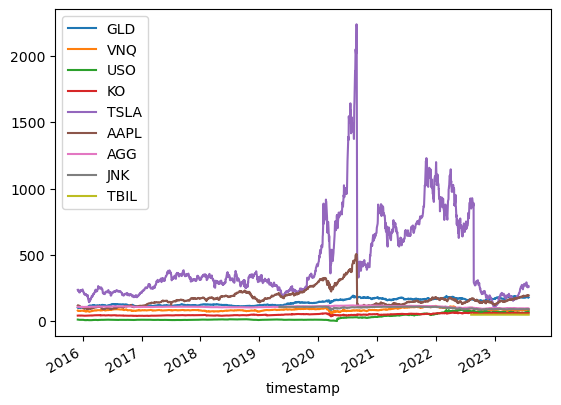

In [46]:
# Create a line plot for the new DataFrame for the full length of time in the dataset 
# tickers = ['XLK', 'XLV', 'XLF', 'XLRE', 'XLE', 'XLB', 'XLC', 'XLY', 'XLP','XLI', 'XLU']

df.plot()

In [118]:
# Use the hvplot function to create an interactive graph

df.hvplot(width = 1400, height = 600)

:NdOverlay   [Variable]
   :Curve   [timestamp]   (value)

In [119]:
# Check for zero values within the dataset portfolio_data

sum = 0
for i in portfolio_data.iloc[:,3]:
    if i == 0:
        sum = sum + 1 

print(sum)

0


### Part 3: Next, we get the percent change to calculate reteurns from the closing price dataframe and graph them

<AxesSubplot:xlabel='timestamp'>

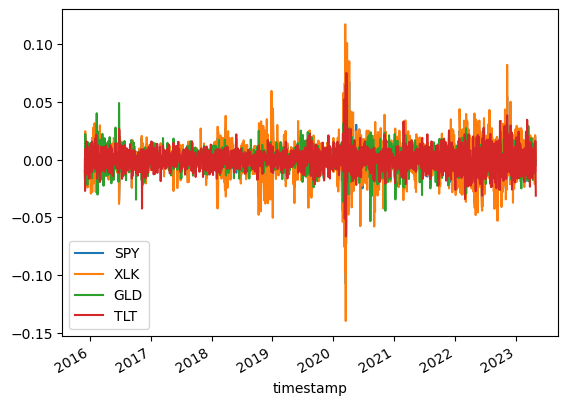

In [120]:
returns = df.pct_change()
returns.plot()

### Part 4: Generating the Efficient Frontier. 
##### We will generate randomly weighted portfolios to plot and measure Sharpe ratios. 
##### We will take the sum of the mean returns generated by the stocks for an average trading year (252 dats). 
###### Then, we will calculate the standard deviation of each portfolio. 

In [114]:
def portfolio_annualized_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights) * 252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns


In [115]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3, num_portfolios))
    n_assets = len(mean_returns)
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(n_assets)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualized_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
        print(portfolio_return)
    return results, weights_record

In [116]:
# inputs for above variables
# NOTE: For the risk free rate, we are using the 10 year treasury yield at the time the data was pulled
# which is 3.44% 

returns = df.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
risk_free_rate = 0.034

### Part 5: Calculate returns, st dev, volatility, and sharpe ratio of the generated portfolios and display results

In [119]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0, max_sharpe_idx], results[1, max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx], index=df.columns, columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i * 100, 2) for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0, min_vol_idx], results[1, min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx], index=df.columns, columns=['allocation'])
    min_vol_allocation.allocation = [round(i * 100, 2) for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-" * 80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualized Return:", round(rp, 2))
    print("Annualized Volatility:", round(sdp, 2))
    print("\n")
    print(max_sharpe_allocation)
    
    print ("-" * 80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualized Return:", round(rp_min, 2))
    print("Annualized Volatility:", round(sdp, 2))
    print("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0, :], results[1, :], c=results[2, :], cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp, rp, marker='*', color='r', s=500, label='Maximum Sharpe Ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualized volatility')
    plt.ylabel('annualized returns')
    plt.legend(labelspacing=0.8)


0.27986702510619305
0.20690495954024096
0.18732531287594867
0.28671446881078727
0.3060983363513481
0.19983848873146198
0.21518814369093753
0.2707394147838221
0.2817349126621855
0.24539371821523936
0.23471973916729988
0.31126807565691533
0.16813766230794258
0.13771441105657908
0.3578431153461814
0.11465704647975168
0.15499005828590565
0.3135898323368275
0.23200760151210545
0.3728846227144278
0.2774905636560843
0.15183246668116449
0.1808417478081477
0.14813230027415
0.18370297187791237
0.3121765393111479
0.3259036149765398
0.22349228455343423
0.35341003229791224
0.17690632628854314
0.39761473217117166
0.18385137710287267
0.17682152844450116
0.14773374361260752
0.2029738600568109
0.15010606439986532
0.17677825157278831
0.2018514267355411
0.10087760867822607
0.37421921839872163
0.30782589097553004
0.1719923952857487
0.27608419015741
0.07196552580277013
0.048636583265270705
0.11628560747784346
0.13517424225249242
0.19143559451897663
0.15921649191888831
0.30016160343615783
0.1245086906867512

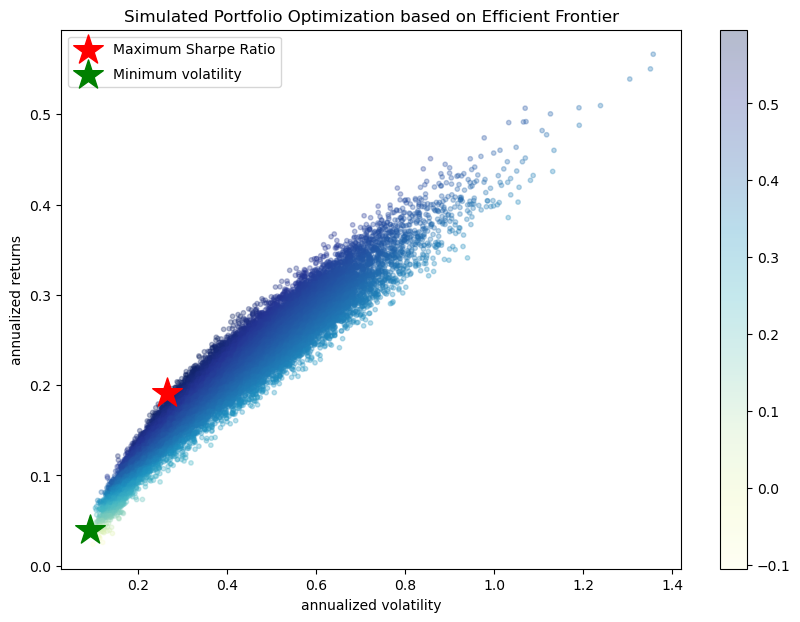

In [122]:
# To display frontier and data:
#mean_returns, cov_matrix, num_portfolios, risk_free_rate

display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [139]:
# Using the lower & upper '95%' confidence intervals from the summary statistics
# calculate the range of the probable cumulative returns for a $100,000.00 investment
ci_95_lower_cumulative_return = MC_summary_statistics[8]*100000
ci_95_upper_cumulative_return = MC_summary_statistics[9]*100000

# Print the results 
print(f"There is a 95% chance that an initial investment of $100,000 in the portfolio"
      f" over the next 5 years will end within the range of"
      f" ${ci_95_lower_cumulative_return: ,.2f} and ${ci_95_upper_cumulative_return: ,.2f}.")

There is a 95% chance that an initial investment of $100,000 in the portfolio over the next 5 years will end within the range of $ 104,516.35 and $ 369,288.20.


#### Part 15(b) Minimum Volatility Portfolio

In [140]:
MC_min_volatility = MCSimulation(
    portfolio_data = mc_df,
    weights = [.3344,  .0003, .2786,  .3867],
    num_simulation = 500,
    num_trading_days = 252*5
)

# Print the simulation input data 
MC_min_volatility.portfolio_data.head()

SPY                                          \
                              open      high       low    close     volume   
timestamp                                                                    
2015-12-01 05:00:00+00:00  209.440  210.8200  209.1100  210.680   97858418   
2015-12-02 05:00:00+00:00  210.615  211.0000  208.2300  208.529  108069059   
2015-12-03 05:00:00+00:00  208.830  209.1500  204.7511  205.610  166224154   
2015-12-04 05:00:00+00:00  206.080  209.9700  205.9300  209.620  192878747   
2015-12-07 05:00:00+00:00  209.230  209.7295  207.2000  208.350  102027111   

                                                                         XLK  \
                          trade_count        vwap symbol daily_return   open   
timestamp                                                                      
2015-12-01 05:00:00+00:00      337780  209.921410    SPY          NaN  44.14   
2015-12-02 05:00:00+00:00      367013  209.563055    SPY    -0.010210  44.40   
2015-12-03 05:00:00+00:00      546768  206.878936    SPY    -0.013998  44.19   
2015-12-04 05:00:00+00:00      556731  208.178631    SPY     0.019503  43.63   
2015-12-07 05:00:00+00:00      374705  208.276128    SPY    -0.006059  44.52   

                           ...          GLD     TLT                          \
                           ... daily_return    open    high     low   close   
timestamp                  ...                                                
2015-12-01 05:00:00+00:00  ...          NaN  121.26  122.85  121.26  122.83   
2015-12-02 05:00:00+00:00  ...    -0.015546  122.66  123.04  122.19  122.87   
2015-12-03 05:00:00+00:00  ...     0.010627  121.36  121.40  118.99  119.53   
2015-12-04 05:00:00+00:00  ...     0.022209  119.53  120.93  119.47  120.58   
2015-12-07 05:00:00+00:00  ...    -0.012978  120.81  122.46  120.80  121.75   

                                                                    \
                             volume trade_count        vwap symbol   
timestamp                                                            
2015-12-01 05:00:00+00:00  12726590       50097  122.401275    TLT   
2015-12-02 05:00:00+00:00   7337805       33920  122.600470    TLT   
2015-12-03 05:00:00+00:00  16612180       73903  119.869560    TLT   
2015-12-04 05:00:00+00:00  11843829       58714  120.357128    TLT   
2015-12-07 05:00:00+00:00   9016691       46972  121.775251    TLT   

                                        
                          daily_return  
timestamp                               
2015-12-01 05:00:00+00:00          NaN  
2015-12-02 05:00:00+00:00     0.000326  
2015-12-03 05:00:00+00:00    -0.027183  
2015-12-04 05:00:00+00:00     0.008784  
2015-12-07 05:00:00+00:00     0.009703  

[5 rows x 36 columns]

In [76]:
# Run the Monte Carlo simulation to forecast the five years cumulative returns 
MC_min_volatility.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998152,0.996973,1.001204,1.004698,0.999417,0.999103,1.004476,1.005350,0.991847,0.996986,...,0.989155,0.999386,0.989159,1.004580,0.995732,1.010509,1.006286,1.002713,1.002147,1.004699
2,1.004716,1.001627,1.005469,1.017864,1.000719,0.991782,0.992197,1.010948,0.982530,0.999978,...,0.987769,1.004502,0.998178,1.000543,0.995853,1.005885,1.002613,1.005318,1.002711,1.016413
3,1.009084,1.001055,1.006968,1.021622,0.998382,0.992159,0.993326,1.013555,0.976524,1.003275,...,0.973440,1.011000,1.015426,1.008562,0.996283,1.016365,1.003920,0.989423,0.997676,1.014988
4,1.002562,0.992402,1.011961,1.020064,1.013587,0.995679,0.995668,1.008629,0.985499,1.003120,...,0.959848,1.011481,1.008262,1.011731,1.000031,1.016124,0.993358,0.987059,0.987187,1.016677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.009047,1.929525,1.343303,1.453319,1.438711,1.957422,1.755841,1.195657,1.124521,1.364781,...,1.184209,2.753523,1.659341,1.562981,1.161207,1.048908,1.616985,1.609681,1.279224,1.092276
1257,1.010849,1.925175,1.361080,1.477580,1.428146,1.946016,1.757446,1.187336,1.128542,1.376496,...,1.191494,2.764481,1.648126,1.559091,1.177682,1.057597,1.634331,1.619154,1.283995,1.090634
1258,1.006536,1.934207,1.364278,1.494494,1.421938,1.948230,1.773416,1.184448,1.123582,1.384265,...,1.192605,2.736883,1.648481,1.552358,1.167439,1.058833,1.639972,1.643231,1.273969,1.090472
1259,1.010008,1.955842,1.374080,1.501783,1.434977,1.947284,1.790862,1.186392,1.127044,1.384046,...,1.195697,2.759637,1.652358,1.560085,1.161169,1.050481,1.631597,1.632655,1.266719,1.089491


In [ ]:
# Plot the simulation outcomes 
MC_min_line_plot = MC_min_volatility.plot_simulation()

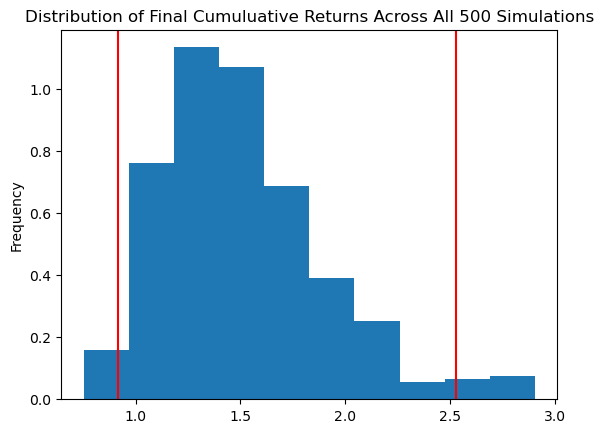

In [78]:
# Visualize the Monte Carlo simulation by creating a histogram
even_weight_distribution_plot = MC_min_volatility.plot_distribution()

In [79]:
# Generate summary statistics from the Monte Carlo Simulation
# Set the summary statistics equal to a variable for future use 
MC__min_summary_statistics = MC_min_volatility.summarize_cumulative_return()
print(MC__min_summary_statistics)

count           500.000000
mean              1.507046
std               0.391654
min               0.753848
25%               1.220866
50%               1.439627
75%               1.715659
max               2.906154
95% CI Lower      0.917523
95% CI Upper      2.529029
Name: 1260, dtype: float64


In [83]:
# Using the lower & upper '95%' confidence intervals from the summary statistics
# calculate the range of the probable cumulative returns for a $100,000.00 investment
ci_95_lower_cumulative_return_min = MC__min_summary_statistics[8]*100000
ci_95_upper_cumulative_return_min = MC__min_summary_statistics[9]*100000

# Print the results 
print(f"There is a 95% chance that an initial investment of $100,000 in the portfolio"
      f" over the next 5 years will end within the range of"
      f" ${ci_95_lower_cumulative_return_min: ,.2f} and ${ci_95_upper_cumulative_return_min: ,.2f}.")

There is a 95% chance that an initial investment of $100,000 in the portfolio over the next 5 years will end within the range of $ 91,752.29 and $ 252,902.91.
